In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# **Newton-Raphson method**
The Newton-Raphson method is a method of finding roots of a nonlinear function. Unlike the Bisection method, it falls under the category of **Open methods** due to the fact that we only need one initial guess that does not have to bracket the actual root.

In today's lab, we will be implementing the Newton-Raphson method in python. We will be considering the function $f(x)$ as an array of coefficients, for instance if we want to have $f(x) = x^3+x-2$, then in python we will create an array as follows:

In [2]:
f = [1,0,1,-2]

Note that your implementation should be able to handle the array `f` of any size, which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array `f` given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array `f` and a point `x` as input and evaluate the value of the function at that point x using a loop and return that value.

This function will be called in the other function that you will implement, which is as follows:
```
newtonraphson(f, x_init, epsilon)
```
This function will return the root of the equation represented by the array `f` and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute Relative Approximate Error $|\epsilon_a|$ of at most epsilon (%). Note that, here epsilon is the Relative Error Tolerance $\epsilon_s$.

You will also need a function to calculate the derivative $f'(x)$ at some value of $x$.
```
derivative(f, x)
```

## Task 1: The Function

In [6]:
# Write a function to return the value of the polynomial at the point x
def func(f, x):
    result = 0
    for i, coef in enumerate(f):
        result += coef * (x ** (len(f) - i - 1))
    return result

In [7]:
print(func(f,2))
print(func(f,3))
print(func(f,5))

8
28
128


Sample Test Cases:
<br>
**Input**   $\quad$    **Output**
<br>
2$\quad\quad\quad$8
<br>
3$\quad\quad\quad$28
<br>
5$\quad\quad\quad$128

## Task 2: The Derivative of the Function

In [4]:
# Write a function for evaluating the derivative of the polynomial given by array f
def derivative(f, x):
    n = len(f)
    sum = 0

    for i in range(n):
        power = n - i - 2
        sum += (power + 1) * f[i] * (x ** power)

    finalDerivative = sum
    return finalDerivative

In [5]:
print(derivative(f,2))
print(derivative(f,3))
print(derivative(f,5))

13.0
28.0
76.0


Sample Test Cases:
<br>
**Input**   $\quad$    **Output**
<br>
2$\quad\quad\quad$13
<br>
3$\quad\quad\quad$28
<br>
5$\quad\quad\quad$76

## Task 3: The Algorithm
Now, its time to implement the whole algorithm. Take the initial guess as $2$, the Relative Error Tolerance $\epsilon_s$ as $0.01$, and the maximum number of iterations as $10000$.

In [41]:
x_init = 2
epsilon = 0.01
MAX_ITERS=10000

# Complete the following function
def newtonraphson(f, x_init, epsilon):
    x_next = x_init
    iterations = []
    approximations = []

    for iteration in range(MAX_ITERS):
        f_x = func(f, x_next)
        f_deri = derivative(f, x_next)

        if abs(f_deri) < 1e-10:
            break

        x_prev = x_next
        x_next = x_prev - f_x / f_deri

        iterations.append(iteration)
        approximations.append(x_next)

        if abs(x_next - 1.0) < 1e-10:
            break

    return iterations, approximations

In [42]:
# Test your function here
print(newtonraphson(f, x_init, epsilon))

([0, 1, 2, 3, 4, 5], [1.3846153846153846, 1.0825861255309106, 1.0047803500618726, 1.0000170707310327, 1.0000000002185543, 1.0])


The value should be very very close to $1$. (*e.g.* $1.0000170707310327$)<br>
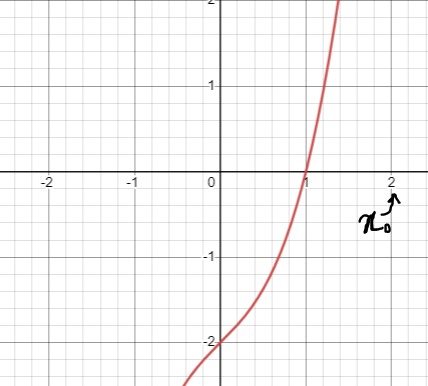

## Task 4: Plotting
In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the `matplotlib` library.

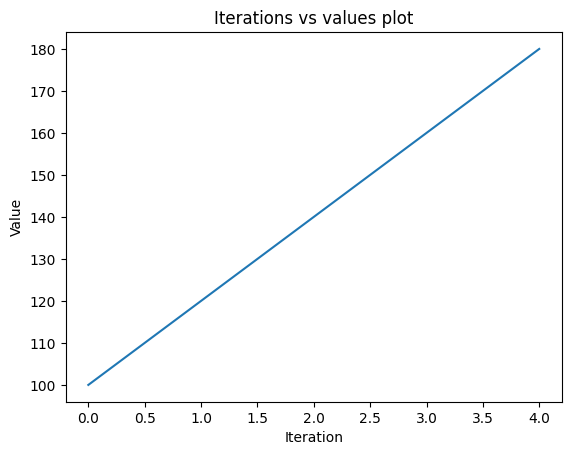

In [43]:
iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Root Approximation $(x_i)$ along the $Y$-axis.

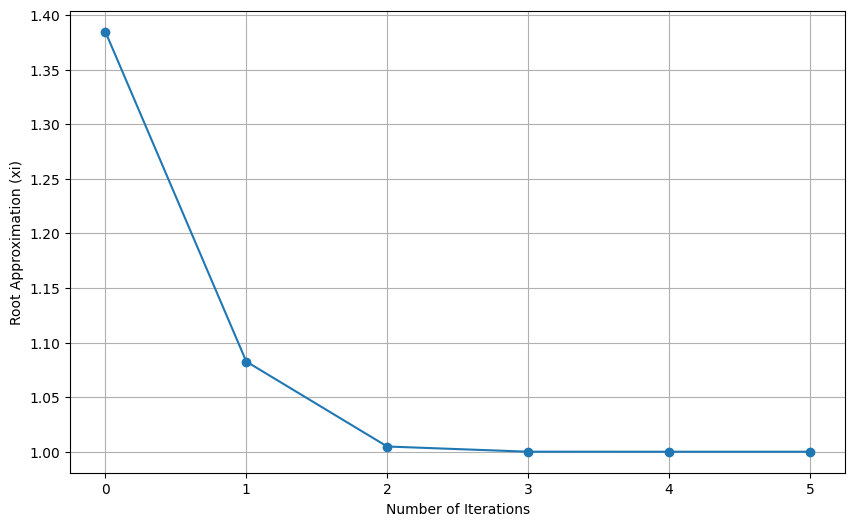

In [47]:
iterations, approximations = newtonraphson(f, x_init, epsilon)
plt.figure(figsize=(10, 6))
plt.plot(iterations, approximations, marker ='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Root Approximation (xi)')
plt.grid(True)
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Relative Approximate Error $(\epsilon_a)$ along the $Y$-axis.

In [38]:
def newtonraphson(f, x_init, epsilon):
    x_next = x_init
    iterations = []
    relative_errors = []

    for iteration in range(MAX_ITERS):
        f_x = func(f, x_next)
        f_deri = derivative(f, x_next)

        if abs(f_deri) < 1e-10:
            break

        x_prev = x_next
        x_next = x_prev - f_x / f_deri

        relative_error = abs((x_next - x_prev) / x_next)

        iterations.append(iteration)
        relative_errors.append(relative_error)

        if relative_error < epsilon:
            break

    return iterations, relative_errors

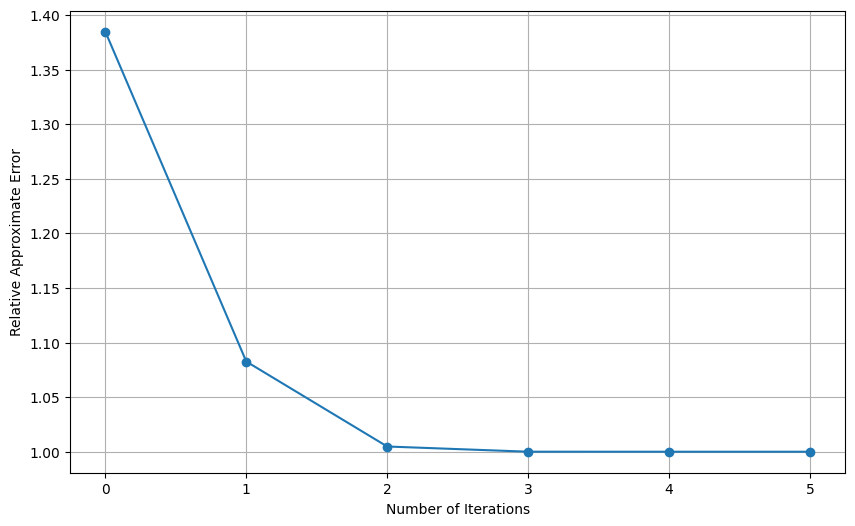

In [45]:
iterations, relative_errors = newtonraphson(f, x_init, epsilon)

plt.figure(figsize=(10, 6))
plt.plot(iterations, relative_errors, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Relative Approximate Error')
plt.grid(True)
plt.show()

Plot a graph with Number of Iterations along the $X$-axis and Number of Significant Digits that are at least correct $(m)$ along the $Y$-axis.

In [51]:
import math
def significant_digits(approximation, true_value):
    relative_error = abs(approximation - true_value) / true_value
    return -math.floor(math.log10(relative_error))

def newtonraphson(f, x_init, epsilon):
    x_next = x_init
    true_root = 1.0

    iterations = []
    correct_digits = []

    for iteration in range(MAX_ITERS):
        f_x = func(f, x_next)
        f_deri = derivative(f, x_next)

        if abs(f_deri) < 1e-10:
            break

        x_prev = x_next
        x_next = x_prev - f_x / f_deri

        correct_digit = significant_digits(x_next, true_root)

        iterations.append(iteration)
        correct_digits.append(correct_digit)

        if correct_digit >= 10:
            break

    return iterations, correct_digits